
<h1 style="text-align: center; font-weight: bold; font-size: 32px;">Renewable Energy and Weather Conditions</h1> 

### Exploratory data analysis on the impacts of different Weather conditions on Renewable Energy Generation.

In [ ]:
#Imported Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORTING DATASET

In [3]:
df = pd.read_csv("./solar_weather.csv")


## DATA OBSERVATION
- **Understanding fields**

In [4]:
df.head(10)


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
5,2017-01-01 01:15:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
6,2017-01-01 01:30:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
7,2017-01-01 01:45:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
8,2017-01-01 02:00:00,0,0.0,1.9,1020,100,5.5,0.0,0.0,100,0,0,450,0.0,4,2,1
9,2017-01-01 02:15:00,0,0.0,1.9,1020,100,5.5,0.0,0.0,100,0,0,450,0.0,4,2,1


- **Summerizing dataset**

*This function gives us eagle view of our dataset using statistical methods.*


In [5]:
df.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


In [6]:
#Total information about the dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

- Our findings
1) There are **17 Columns** in dataset. Out of which 6 columns are of **float** type, 10 columns are of **integer** type, 1 is of **object** type.
2) There are **196776 Rows** in dataset.
3) As we can see the column **Time** is of object type we need to convert it in **datetime** format. 
4) There will be 0 null entries in our data set as our columns include **non-null** condition.


In [7]:
#convert Time column in datetime format

df['Time'] = pd.to_datetime(df['Time'])

df

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8


In [8]:
df.dtypes #Data type identification


Time                      datetime64[ns]
Energy delta[Wh]                   int64
GHI                              float64
temp                             float64
pressure                           int64
humidity                           int64
wind_speed                       float64
rain_1h                          float64
snow_1h                          float64
clouds_all                         int64
isSun                              int64
sunlightTime                       int64
dayLength                          int64
SunlightTime/daylength           float64
weather_type                       int64
hour                               int64
month                              int64
dtype: object

**As we can see time column got converted in Date time format**

In [9]:
#lets rename months entries from numeric to words eg. 1 = Jan for future use

df['month'] = df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

df.head(3)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,Jan
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,Jan
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,Jan


## Lets plot some graphs for visual analysis to get an overview data set

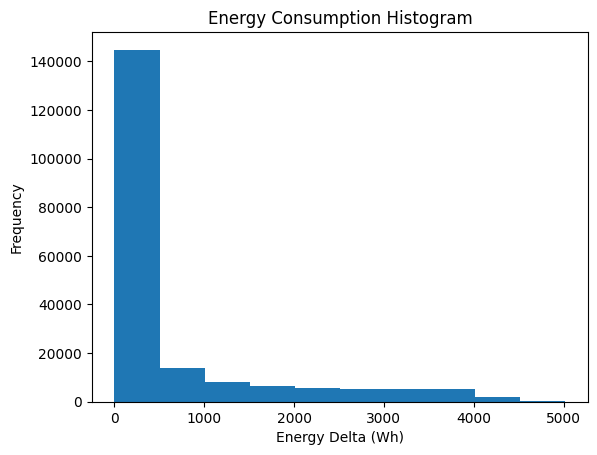

In [10]:
#plotting histogram for energy consumption

plt.hist(df['Energy delta[Wh]'], bins=10)


plt.xlabel('Energy Delta (Wh)') #labelling x axis
plt.ylabel('Frequency')         #labelling y axis
plt.title('Energy Consumption Histogram') #title name for graph

plt.show()


**Out of 196776 entries almost 140000 lies in 0-1000 energy frame.**

Text(0, 0.5, 'Energy delta[Wh]')

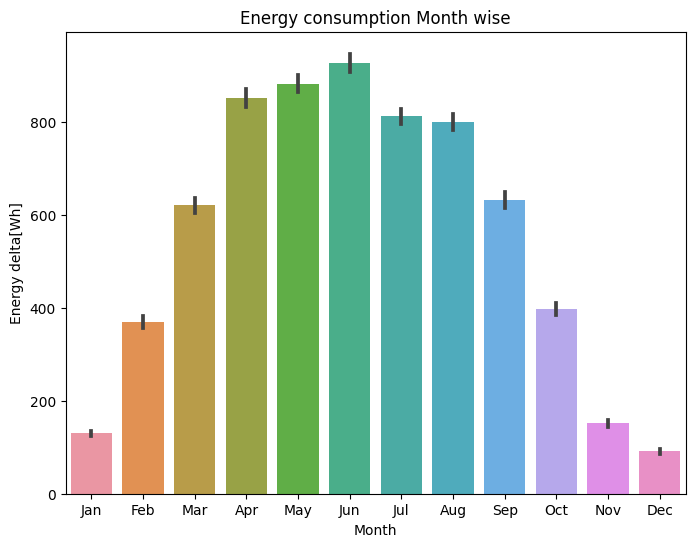

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['month'], y=df['Energy delta[Wh]'])
plt.title('Energy consumption Month wise')
plt.xlabel('Month')
plt.ylabel('Energy delta[Wh]')

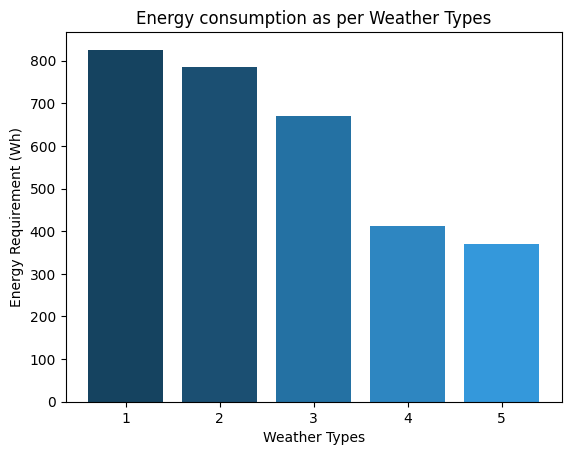

In [12]:
# calculating mean energy consumption per weather type
mean_energy = df.groupby('weather_type')['Energy delta[Wh]'].mean()

fig, ax = plt.subplots()
colors = ['#154360', '#1B4F72', '#2471A3', '#2E86C1', '#3498DB']

ax.bar(mean_energy.index, mean_energy.values, color=colors)
ax.set_title('Energy consumption as per Weather Types')
ax.set_xlabel('Weather Types')
ax.set_ylabel('Energy Requirement (Wh)')

plt.show()



C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Temperature')

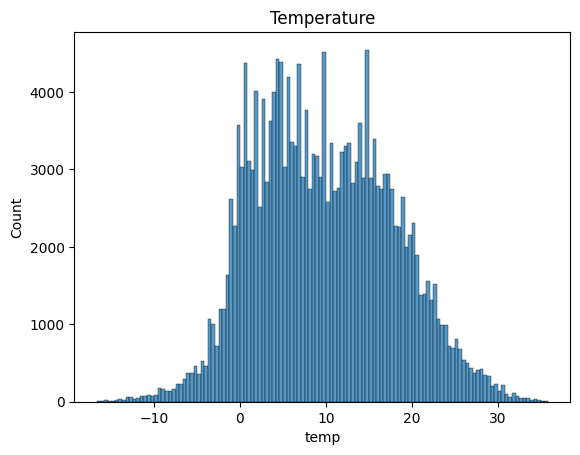

In [13]:
#Plotting graph to understand temperature variance
sns.histplot(df['temp'])
plt.title('Temperature')


 ### Here we are creating a function named **calculate_total_energy** it will give us the total energy consumption for input date.

In [14]:

def calculate_total_energy(df, date_str): #Calculates the total energy consumption for the given input date from the dataframe.
    
        date = pd.to_datetime(date_str).date()
        df_date = df[df['Time'].dt.date == date]
        total_energy = df_date['Energy delta[Wh]'].sum() #this adds total units of energy consumption
        print(f"Total energy consumption on {input_date}: {total_energy} Wh")
        return total_energy
    
    

input_date = input("Enter the date (YYYY-MM-DD):") #user input for perticular date
total_energy = calculate_total_energy(df, input_date)



Total energy consumption on : 0 Wh


## Lets find correlation between fields 

# **Relation between Energy consumption and GHI**


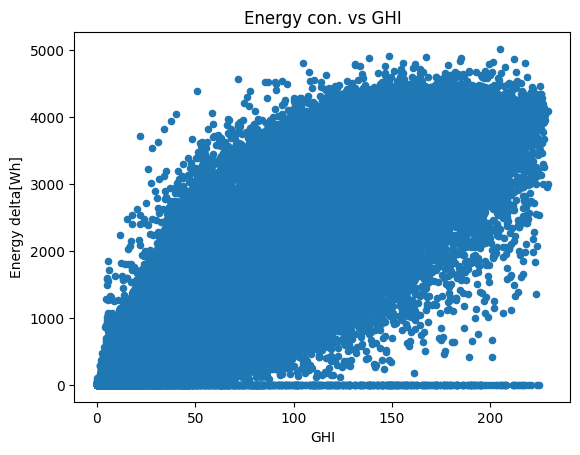

In [15]:


df.plot.scatter(x='GHI', y='Energy delta[Wh]')

plt.xlabel('GHI') #labelling x axis
plt.ylabel('Energy delta[Wh]') #labelling y axis
plt.title('Energy con. vs GHI') #title


plt.show()

 - **The Energy delta[Wh] and GHI is directly proportional to each other.**

# **Graph for maximun GHI per hour**


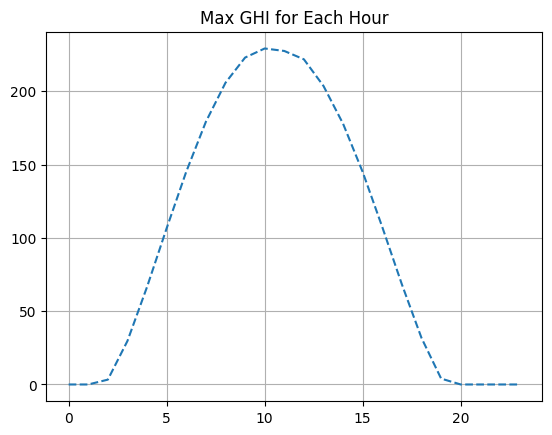

In [16]:

fig = plt.figure()
ax = plt.axes()
plt.grid()

#plt.subplot(2, 1, 1)
hourly_max_ghi = df.groupby('hour')['GHI'].max()
plt.plot(df['hour'].unique(), hourly_max_ghi, linestyle='--')
plt.title('Max GHI for Each Hour') #title

plt.show()




# **Graph for minimun GHI per hour**


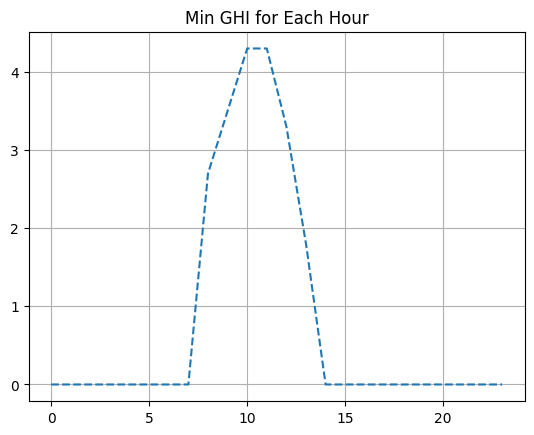

In [17]:
fig = plt.figure()
ax = plt.axes()
plt.grid()

hourly_min_ghi = df.groupby('hour')['GHI'].min()
plt.plot(df['hour'].unique(), hourly_min_ghi, linestyle='--')
plt.title('Min GHI for Each Hour') #title

plt.show()

# **Graph for average GHI per hour**


Text(0.5, 1.0, 'Avg of GHI for Each Hour')

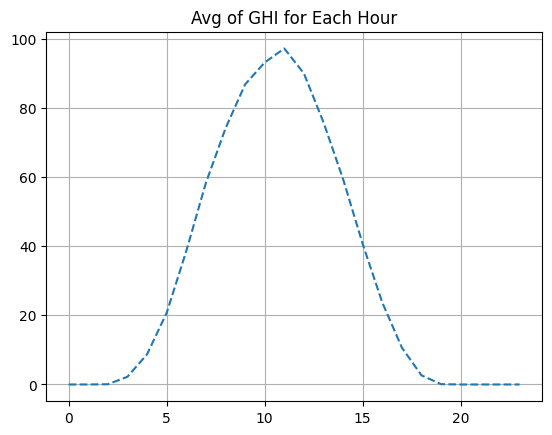

In [18]:
fig = plt.figure()
ax = plt.axes()
plt.grid()

plt.plot(df['hour'].unique(),df.groupby('hour').mean(numeric_only=True)['GHI'],linestyle='--')
plt.title('Avg of GHI for Each Hour')

# **Graph for average GHI per month**


Text(0.5, 1.0, 'Avg of GHI for Each month')

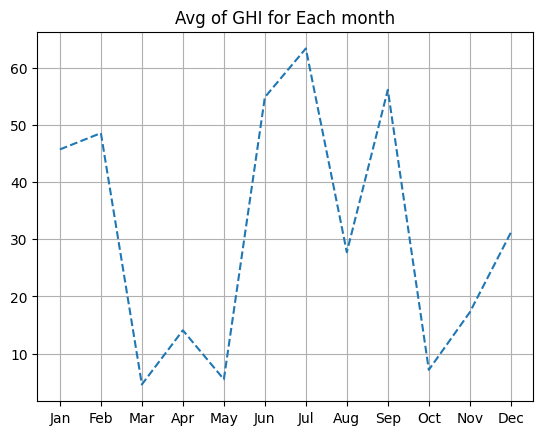

In [19]:
fig = plt.figure()
ax = plt.axes()
plt.grid()

plt.plot(df['month'].unique(),df.groupby('month').mean(numeric_only=True)['GHI'],linestyle='--')
plt.title('Avg of GHI for Each month')

# **Relation between Energy consumption and Temperature**


<Figure size 5000x800 with 0 Axes>

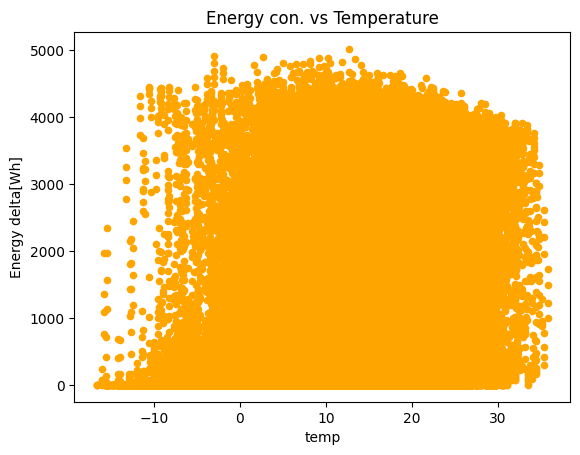

In [20]:

plt.figure(figsize=(50, 8))
df.plot.scatter(x='temp', y='Energy delta[Wh]'[0:500], c ='orange')

plt.xlabel('temp') #labelling x axis
plt.ylabel('Energy delta[Wh]') #labelling y axis
plt.title('Energy con. vs Temperature') #title


plt.show()

 - **In this graph we can see that whenever the temp goes below 0 degrees accordingly the consumption/generation also decreases.**

# **Graph for Average Wind speed per hour**


Text(0.5, 1.0, 'Avg of Wind speed for Each Hour')

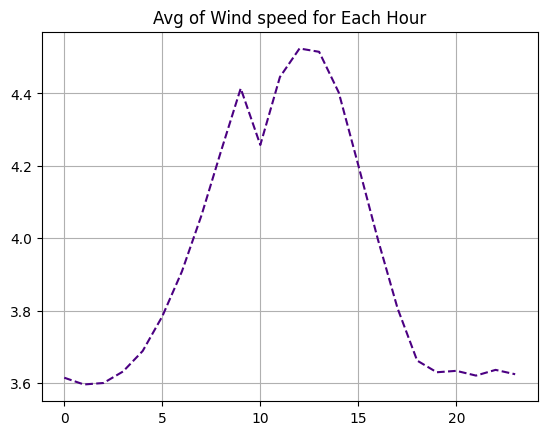

In [21]:
fig = plt.figure()
ax = plt.axes()
plt.grid()

plt.plot(df['hour'].unique(),df.groupby('hour').mean(numeric_only=True)['wind_speed'],color='Indigo',linestyle='--')
plt.title('Avg of Wind speed for Each Hour')

# Comparision between **Hourly average temperature** and **Hourly Average Energy Consumption**


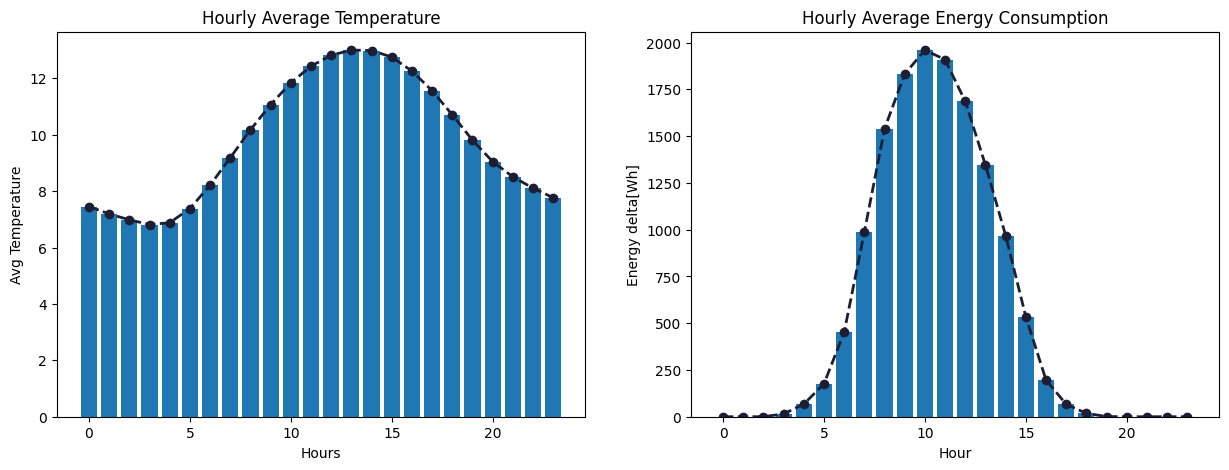

In [22]:


df1 = df.groupby('hour')[['Energy delta[Wh]', 'temp']].mean() # group all the hour and taking mean of energy delta and temperature

fig, x = plt.subplots(1, 2, figsize=(15, 5))

#Graph for the hourly average temp on the first subplot

x[0].bar(df1.index, height=df1['temp'] )
x[0].plot(df1.index, df1['temp'], color='#1C1F33', marker='o', linewidth=2,linestyle='--')
x[0].set_xlabel('Hours')
x[0].set_ylabel('Avg Temperature')
x[0].set_title('Hourly Average Temperature')

#Graph for the hourly average energy consumption on the second subplot
x[1].bar(df1.index, height=df1['Energy delta[Wh]'])
x[1].plot(df1.index, df1['Energy delta[Wh]'], color='#1C1F33', marker='o', linewidth=2,linestyle='--' )
x[1].set_xlabel('Hour')
x[1].set_ylabel('Energy delta[Wh]')
x[1].set_title('Hourly Average Energy Consumption')

# Show the plot
plt.show()


# Comparision between **Hourly average temperature** and **Hourly Average Energy Consumption**


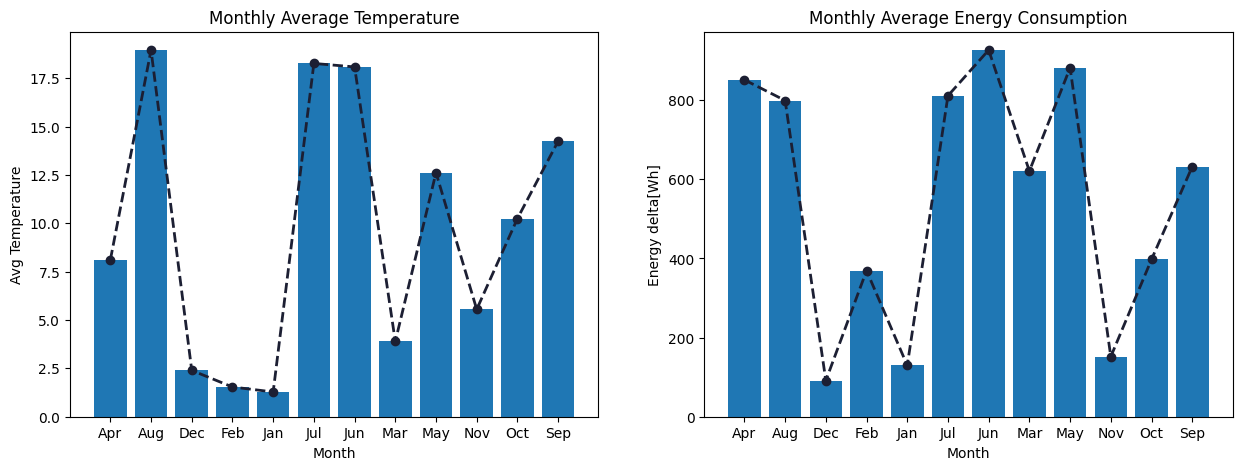

In [23]:



df1 = df.groupby('month')[['Energy delta[Wh]', 'temp']].mean() # group all the hour and taking mean of energy delta and temperature
# Create a figure with two subplots of size 15x5
fig, x = plt.subplots(1, 2, figsize=(15, 5))

#Graph for the monthly average temperature on the first subplot
x[0].bar(df1.index, height=df1['temp'] )
x[0].plot(df1.index, df1['temp'], color='#1C1F33', marker='o', linewidth=2,linestyle='--')
x[0].set_xlabel('Month')
x[0].set_ylabel('Avg Temperature')
x[0].set_title('Monthly Average Temperature')

#Graph for the monthly average energy consumption on the second subplot
x[1].bar(df1.index, height=df1['Energy delta[Wh]'])
x[1].plot(df1.index, df1['Energy delta[Wh]'], color='#1C1F33', marker='o', linewidth=2,linestyle='--' )
x[1].set_xlabel('Month')
x[1].set_ylabel('Energy delta[Wh]')
x[1].set_title('Monthly Average Energy Consumption')

# Show the plot
plt.show()


# Conclusion
**1.More than 70% of energy consumption is lie between 0-1000 Wh.<br>
2.The Energy delta [Wh] and GHI is directly proportional to each other.<br>
3.Temperature is one of the key factors when compared with energy consumption/generation.<br>
4.Monthly consumption/generation of energy is more in months of April, May, June followed by March, July, August, September and least in October, November, December, & January.<br>
5.When we compare the monthly average temp with monthly average consumption despite of low temperature in Feb, Mar & Apr we noticed high consumption.**
